### 무게를 찾기
- 목표 : 농어(Perch) 길이 피쳐를 사용해서 무게를 예측하기
- 데이터 셋 : fish.csv
- 피쳐/속성 : Length
- 타겟/라벨 : Weight

[1] 데이터 준비 및 피쳐/타겟 분석

In [530]:
import pandas as pd 
import matplotlib.pyplot as plt

In [531]:
fishDF=pd.read_csv('../data/fish.csv')

In [532]:
PerchDF=fishDF[fishDF['Species']=='Perch']
PerchDF.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [533]:
PerchDF.reset_index(drop=True,inplace=True)
PerchDF.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Perch,5.9,8.4,8.8,2.1120,1.4080
1,Perch,32.0,13.7,14.7,3.5280,1.9992
2,Perch,40.0,15.0,16.0,3.8240,2.4320
3,Perch,51.5,16.2,17.2,4.5924,2.6316
4,Perch,70.0,17.4,18.5,4.5880,2.9415


[1-1] 피쳐분석 => 상관계수값, 시각화 2가지 모두 고려

In [534]:
# 관계성확인
PerchDF.corr(numeric_only=True)

,Weight,Length,Diagonal,Height,Width
Weight,1.000000,0.958656,0.959506,0.968441,0.963943
Length,0.958656,1.000000,0.999779,0.985584,0.974617
Diagonal,0.959506,0.999779,1.000000,0.985909,0.975131
Height,0.968441,0.985584,0.985909,1.000000,0.982943
Width,0.963943,0.974617,0.975131,0.982943,1.000000


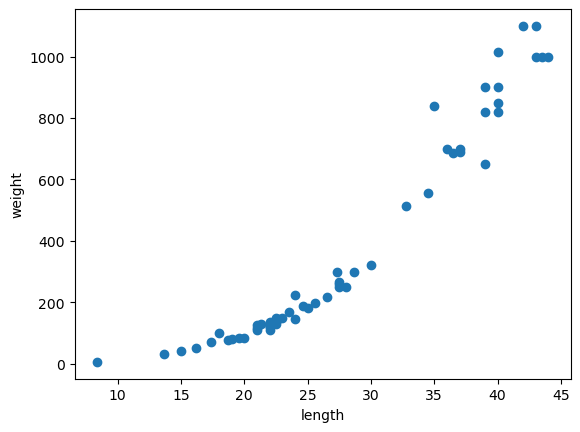

In [535]:
plt.scatter(PerchDF['Length'],PerchDF['Weight'])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

[2] 학습 준비
- 학습알고리즘 : KNN Regressor
- 피쳐 스케일링
- 학습용/테스트용 데이터셋분리

[2-1] 피쳐와 타겟 분리

In [536]:
# 피쳐 타겟 설정
# 피쳐 2차원 잊지말것!
feature=PerchDF[['Length']]
target=PerchDF['Weight']

[2-2] 학습용 & 테스트용 데이터 셋 분리
- 전체 데이터셋 => 학습용:테스터용=75:25, 80:20, 70:30
- 희귀 데이터셋 => 데이터셋 구성요소에 대한 비율 고려 x

In [537]:
from sklearn.model_selection import train_test_split

In [538]:
X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size=0.2,random_state=3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((44, 1), (12, 1), (44,), (12,))

In [539]:
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)

y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

[2-3] 피쳐 스케일링

In [540]:
from sklearn.preprocessing import MinMaxScaler

In [541]:
# 스케일러 인스턴스 생성
mmscale=MinMaxScaler()

In [542]:
# 스케일러에 데이터셋 전용 속성값 설정
mmscale.fit(X_train)

MinMaxScaler()

In [543]:
mmscale.data_min_,mmscale.min_ ,mmscale.data_max_ ,mmscale.scale_

(array([8.4]), array([-0.23931624]), array([43.5]), array([0.02849003]))

In [544]:
# 학습용 테스트용 셋 스케일링
X_train_scaled=mmscale.transform(X_train)
X_test_scaled=mmscale.transform(X_test)

[3] 학습 진행

In [545]:
from sklearn.neighbors import KNeighborsRegressor

In [546]:
# 학습 모델인스턴스 생성
model=KNeighborsRegressor()

# 학습용 데이터 셋으로 학습진행
model.fit(X_train_scaled,Y_train)

KNeighborsRegressor()

In [547]:
# 모델 파라미터 => 학습 후 즉, fit() 실행 후 설정되는 매개변수
model.n_features_in_,model.n_samples_fit_,model.effective_metric_,model.effective_metric_params_

(1, 44, 'euclidean', {})

[4] 최적의 k 찾기

In [548]:
scores={}
for k in range(1,model.n_samples_fit_+1):
    # 최근점 이웃의 갯수 설정 <== 모델의 성능 좌우 : 하이퍼 파라미터
    model.n_neighbors=k

    # 성능평가
    score=model.score(X_test_scaled,y_test)

    scores[k]=score

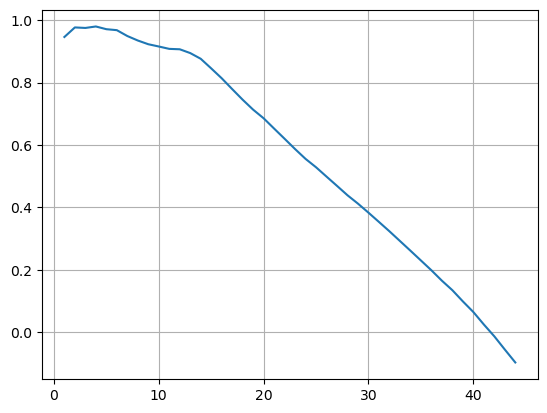

In [549]:
plt.plot(list(scores.keys()),list(scores.values()))
plt.grid()
plt.show()

In [550]:
# score 가 가장 높은 k 찾기
bestK=sorted(scores.items(),key=lambda x: x[1], reverse=True) [0][0]

In [551]:
# 모델에 적용 = > n_neighbors 에 설정
model.n_neighbors=bestK

[5] 새로운 데이터의 무게 예측하기

In [552]:
new_length=input('농어의 길이 : ')
print(f'new_length : {new_length}')

new_length : 40


In [553]:
# 2D, 스케일링 적용
new_DF=pd.DataFrame([[new_length]],columns=['Length'])
new_DF

,Length
0,40


In [554]:
new_scaled=mmscale.transform(new_DF)
new_scaled

array([[0.9002849]])

In [555]:
model.predict(new_scaled)

array([896.25])

모델로 예측한값 확인해보기>_<

In [556]:
distance,index=model.kneighbors(new_scaled)
print(distance,index, sep='\n')

[[0. 0. 0. 0.]]
[[12 32 16 33]]


In [558]:
X_train_scaled.reshape(-1)[[12,32,16,32]]

array([0.9002849, 0.9002849, 0.9002849, 0.9002849])

In [563]:
y_train[[12,32,16,33]].mean()

896.25